In [18]:
%run functions.ipynb

Ready: 2023-04-10 00:32:05


In [ ]:
def make_linear_plots(input_filename, rubrics_df, cnt=9999):
    def zero(x,y):
        if x < 0:
            return str(0) +'%'
        return str(round(x,1)) +'%'
    
    dt_now = str(datetime.datetime.now())[2:-9].replace('-','').replace(':','').replace(' ','_')
    word_file = f'{input_filename[:-5]}_report_{dt_now}.docx'
    print(word_file)
    cols1 = ['Рубрика','Час','Количество запросов 2020','Количество запросов 2021','Количество запросов 2022','Количество запросов 2023',]
    cols2 = ['Рубрика','Дата','Количество запросов 2020','Количество запросов 2021','Количество запросов 2022','Количество запросов 2023',]
    cols3 = ['Рубрика','Неделя','Количество запросов 2020','Количество запросов 2021','Количество запросов 2022','Количество запросов 2023',]
    cols4 = ['Рубрика','День недели','Количество запросов 2020','Количество запросов 2021','Количество запросов 2022','Количество запросов 2023',]
    dff1 = pd.read_excel(input_filename, sheet_name='Часы')[cols1]
    dff2 = pd.read_excel(input_filename, sheet_name='Даты')[cols2]
    dff3 = pd.read_excel(input_filename, sheet_name='Недели')[cols3]
    dff4 = pd.read_excel(input_filename, sheet_name='Дни недели')[cols4]
    
    i = 0
    for rubric in tqdm(rubrics_df[:].iloc[:,0].values[0:cnt]):
        dff1_test = dff1[dff1['Рубрика'] == rubric].set_index(dff1.columns[1])
        dff2_test = dff2[dff2['Рубрика'] == rubric].set_index(dff2.columns[1])
        dff3_test = dff3[dff3['Рубрика'] == rubric].set_index(dff3.columns[1])
        dff4_test = dff4[dff4['Рубрика'] == rubric].set_index(dff4.columns[1])
        dff4_test.index = (['пн','вт','ср','чт','пт','сб','вс'])
        dff1_test.index = dff1_test.index.astype(str)
        i+=1
        j=0
        for d in [dff1_test, dff2_test, dff3_test, dff4_test]: 
            j+=1
            ax = sns.lineplot(data = d, linewidth=4, palette=['#4F81BD', '#9BBB59', '#F79646', '#C0504D'])
            plt.rcParams['figure.figsize']=17,10.8
            plt.rcParams['font.size'] = '16'
            plt.rcParams['figure.dpi'] = 2**8
            plt.rcParams['figure.facecolor'] = 'white'
            fpath = Path(mpl.get_data_path(), r"C:\Users\Mamed\Downloads\arialnarrow.ttf")
            
            
            plt.legend(['2020', '2021', '2022', '2023'], prop=fpath)
            plt.xticks(font=fpath)
            plt.yticks(font=fpath)
            plt.grid(visible=True, linewidth=0.3)
            ax.set_xlabel('')
            ax.yaxis.set_major_formatter(FuncFormatter(zero))
            ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
            ax.yaxis.set_major_locator(ticker.LinearLocator(numticks=6))  
            title_text = f'{i:02}/{j}. {rubric}. '
            img_file_name = input_filename.replace('files/','')[:-5]
            img_file_name_final = f'pictures/{img_file_name}_{i:02}_{j}.png'
            if 'Час' == d.index.name:
                ax.set_title(f'{title_text}Запросы по часам, шт.', font=fpath)
            elif 'Дата' == d.index.name:
                ax.xaxis.set_major_locator(ticker.MultipleLocator(4)) 
                ax.set_title(f'{title_text}Запросы по датам, шт.', font=fpath)
            elif 'Неделя' == d.index.name:
                ax.set_title(f'{title_text}Запросы по неделям, шт.', font=fpath)
            else:
                ax.set_title(f'{title_text}Запросы по дням недели, шт.', font=fpath) 
            
            im = plt.imread(r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\лого_2гис_232_354.png")
            ax.figure.figimage(im, 3250, 150, zorder=1, alpha=0.5)
          
            im = plt.imread(r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\лого_шт_232_354.png")
            ax.figure.figimage(im, 200, 1800, zorder=1, alpha=0.5)

            ax.figure.savefig(img_file_name_final, bbox_inches='tight')
            add_image(word_file, img_file_name_final, rubric)
            plt.show()

In [19]:
colors_list_full

NameError: name 'colors_list_full' is not defined

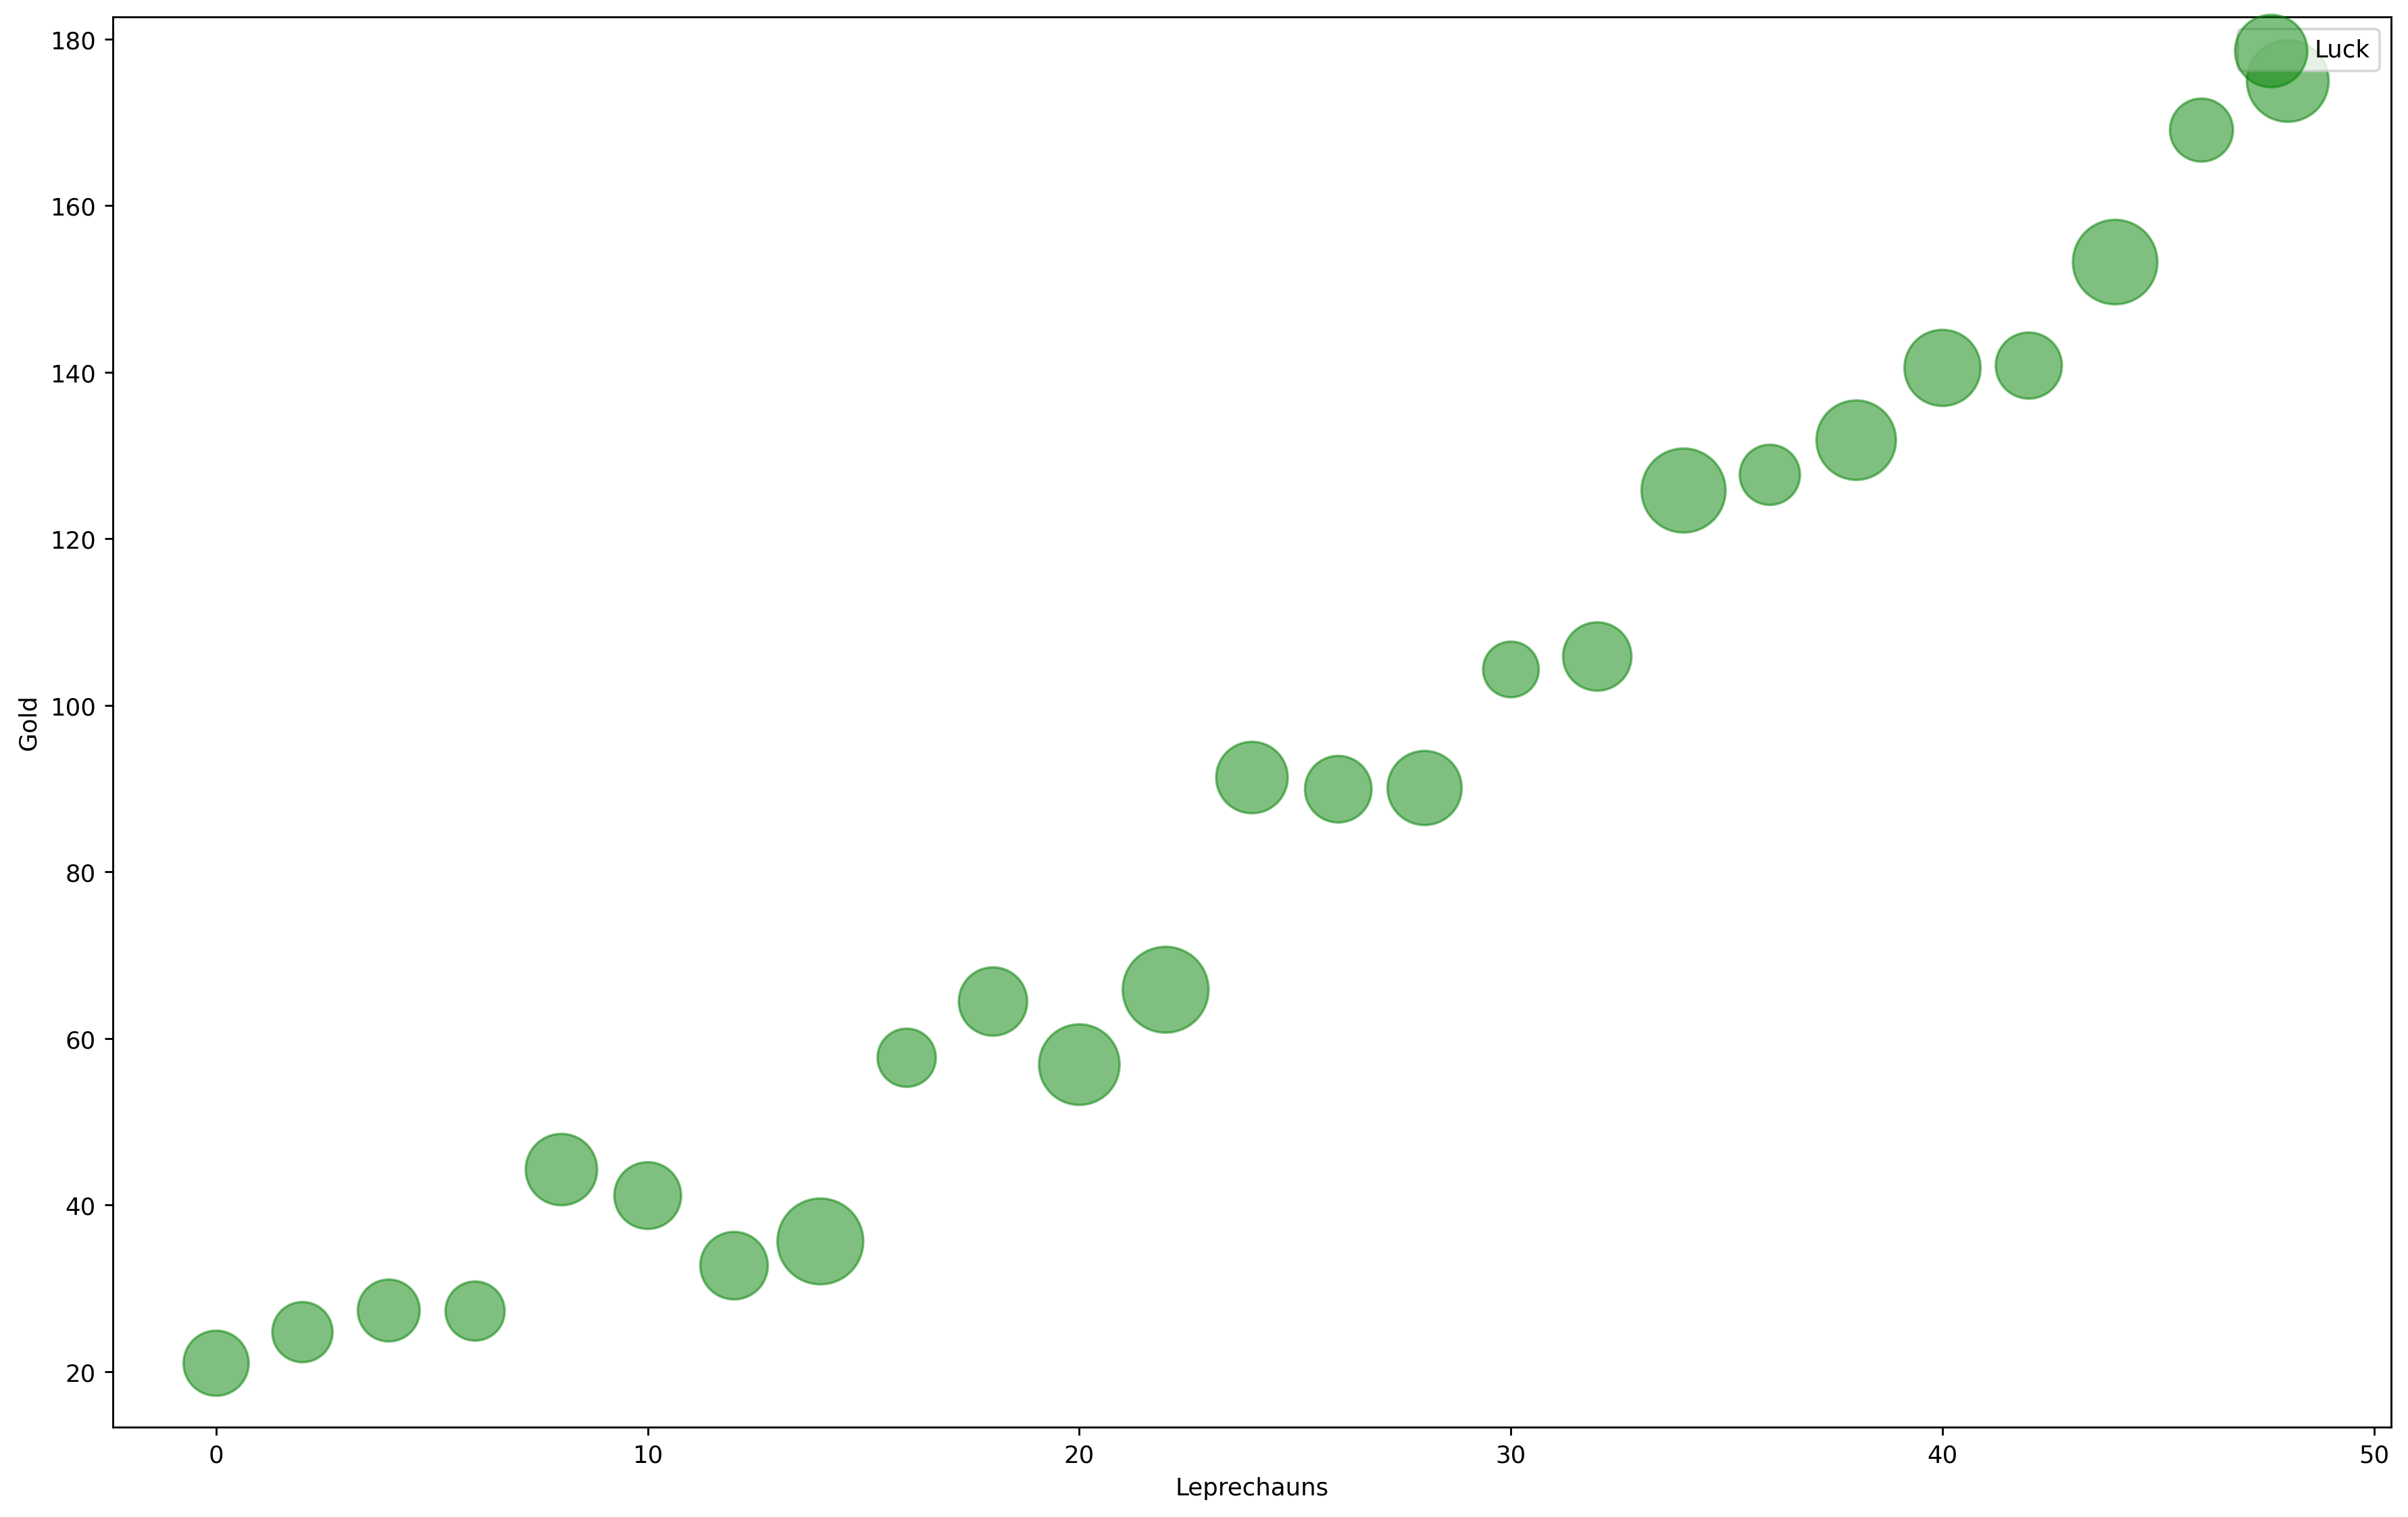

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcParams['figure.figsize']=17,10.8
plt.rcParams['figure.dpi'] = 2**8
x = np.arange(0.0, 50.0, 2.0)
y = x ** 1.3 + np.random.rand(*x.shape) * 30.0
sizes = np.random.rand(*x.shape) * 800 + 500

fig, ax = plt.subplots()

ax.scatter(x, y, sizes, c="green", alpha=0.5, marker='o',
           label="Luck")
ax.set_xlabel("Leprechauns")
ax.set_ylabel("Gold")
ax.legend()
plt.show()